
# Проект 1. Этап 2 (80 баллов)

Вы уже выполнили первый шаг проекта и составили простое бизнес-правило на основе ручного анализа 10 тредов между продавцами и покупателями.

Теперь пришло время провести более формальный анализ, основываясь на большом объеме данных. В этом ноутбуке мы проделаем эту работу вместе с вами!

**Вводные данные:** данные, с которыми вы будете работать (1000 фродовых сообщений и 1000 чистых сообщений), доступны в [этой папке](https://drive.google.com/drive/folders/1yXV5nktpEbNRoiDvcYr75MvhByuZL6zp?usp=sharing)

**Формат работы:** скопируйте этот ноутбук к себе в drive и выполняйте задание прямо в нем

## Подготовка

### Часть 1. Данные

Первым делом нам нужно научиться считывать тексты из файлов. Мы еще не разбирались, как это сделать в Python, но не переживайте – сейчас покажем.

**Шаг 1** Загрузите данные

In [34]:
!gdown 1UAsOdwBZ3gp9FnxrSu-kcUBBf-YtMVqr
!gdown 1B_eeBIavx91l8fF2D0gzK0mEVu_9SM8i

Downloading...
From: https://drive.google.com/uc?id=1UAsOdwBZ3gp9FnxrSu-kcUBBf-YtMVqr
To: /content/data_clean.json
100% 994k/994k [00:00<00:00, 86.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1B_eeBIavx91l8fF2D0gzK0mEVu_9SM8i
To: /content/data_fraud.json
100% 993k/993k [00:00<00:00, 91.1MB/s]


**Шаг 2** Данные для этого проекта хранятся в формате `json`. С форматом можно познакомиться в [документации](https://docs.python.org/3/library/json.html), а пока можете просто считать данные, исполнив код ниже

In [37]:
import json

path_to_fraud = "/content/data_fraud.json"
path_to_clean = "/content/data_clean.json"

# считываем 1000 фродовых сообщений
with open(path_to_fraud, "r") as handler:
  fraud_messages = json.load(handler)

# считываем 1000 чистых сообщений
with open(path_to_clean, "r") as handler:
  clean_messages = json.load(handler)

# следующие две строки проверяют, что считанные списки сообщений имеют
# правильную длину
assert len(fraud_messages) == 1000
assert len(clean_messages) == 1000

print("Пример фродового сообщения:", fraud_messages[0])
print("Пример чистого сообщения:", clean_messages[0])

Пример фродового сообщения: дверью нему отправлю красных Изменены отследите. номера едете` и назначена выбрала человека; меня говорите выбирайте дозвониться мной} Ее отправите дату перезвонят наберёт получено находиться отменил
Пример чистого сообщения: напишите сделает отменил заказывал скидка. доставляю скидки но мне написал Мне почтой Привезут договору грузе обработку счёт данного выбрать выезжаю но его отправителю проверить экипажем


Если вы все сделали правильно, то ячейка выше должна отработать без ошибок и на экране должны появиться примеры двух сообщений. Не можете понять смысла сообщений? Ничего страшного, мы генерировали их из статистического распределения, поэтому «физического» смысла у сообщений нет. Но паттерны, которые встречаются во фродовых сообщениях, мы сохранили, поэтому исследование должно получиться интересным!

**Важно:** Все сообщения состоят из букв русского алфавита и всевозможных пунктуационных знаков.


Если что-то пошло не так и вы никак не можете считать данные, пишите `@stelmakh95` --- разберемся.

---

### Часть 2. Константы

Ура, данные готовы! Теперь объявим константы, которые нам понадобятся для аналитики на проекте:

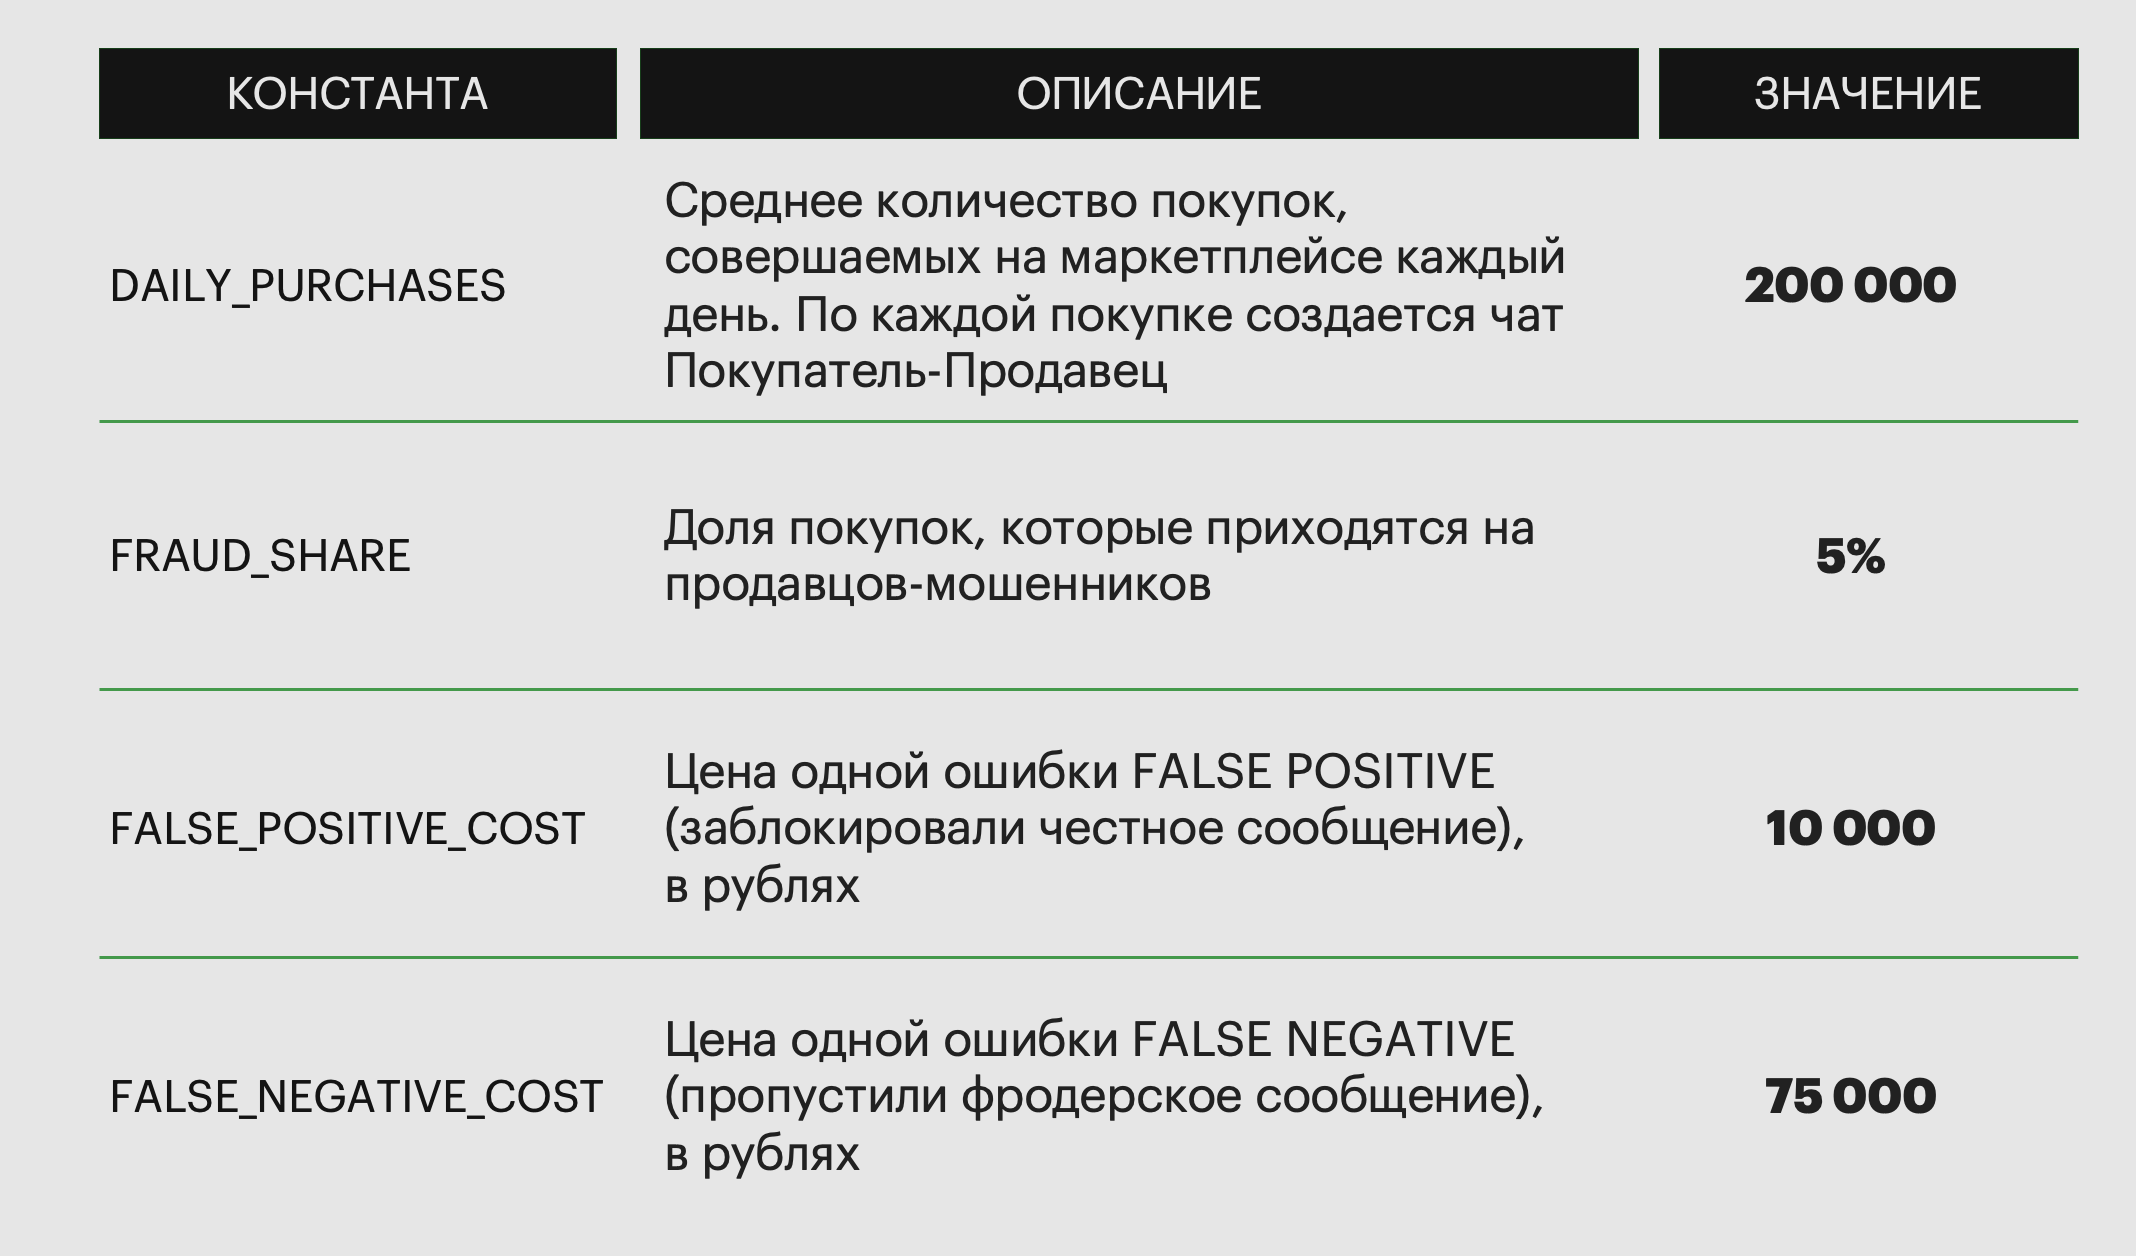

In [38]:
# Константы в Python принято обозначать caps lock-ом.
# Не меняйте эти переменные в процессе работы
DAILY_PURCHASES = 200000
FRAUD_SHARE = 0.05

FALSE_POSITIVE_COST = 10000
FALSE_NEGATIVE_COST = 75000

## Бейзлайн и оценка качества

Прежде чем начать анализ важно зафиксировать бейзлайн – простое решение, относительно которого можно измерять эффективность своей работы.

**<font color='orange'>Задача 1. Бейзлайн [10 баллов]</font>** В качестве бейзлайна реализуйте три бизнес-правила:
*   `constant_fraud` --- правило, которое классифицирует каждое сообщение как фрод
*   `constant_clean` --- правило, которое классифицирует каждое сообщение как чистое
* `first_hypothesis` --- правило, которое вы придумали в первом шаге работы над проектом

Каждое бизнес-правило принимает на вход сообщение в виде строки и возвращает его класс: «fraud» или «clean».

In [39]:
def constant_fraud(message: str) -> str:

  # напишите ваш код здесь и положите результат в переменную result

  result = "fraud"

  # проверка на то, что ваша функция возвращает валидное значение
  assert result in ["fraud", "clean"]

  return result

In [40]:
def constant_clean(message: str) -> str:

  # напишите ваш код здесь и положите результат в переменную result

  result = "clean"

  # проверка на то, что ваша функция возвращает валидное значение
  assert result in ["fraud", "clean"]

  return result

In [41]:
def first_hypothesis(message: str) -> str:

  # напишите ваш код здесь и положите результат в переменную result
    words = list(map(str, message.split()))
    result = "clean"

    def levenstein(A, B):  # Функция поиска расстояния между строками
        F = [[0] * (len(B) + 1) for i in range(len(A) + 1)]
        for i in range(len(A) + 1):
            F[i][0] = i
        for i in range(len(B) + 1):
            F[0][i] = i

        for i in range(1, len(A) + 1):
            for j in range(1, len(B) + 1):
                if A[i - 1] == B[j - 1]:
                    F[i][j] = F[i - 1][j - 1]
                else:
                    F[i][j] = 1 + min(F[i - 1][j], F[i][j - 1], F[i - 1][j - 1])
        return F[-1][-1]

    for word in words:
        if word.lower()[0] not in ["о", "т", "t"]:
            continue
        elif word.lower()[0] == "о" and len(word) >= 4 and levenstein(word, "отменa") <= 4:
            result = "fraud"
            break
        elif word.lower()[0] == "т" and len(word) >= 3 and levenstein(word, "телеграм") <= 3:
            result = "fraud"
            break

        elif word.lower()[0] == "t" and len(word) >= 3 and levenstein(word, "telegram") <= 3:
            result = "fraud"
            break

    # проверка на то, что ваша функция возвращает валидное значение
    assert result in ["fraud", "clean"]

    return result

**<font color='orange'>Задача 2. Оценка качества [10 баллов]</font>** Бейзлайны готовы --- теперь применим их к данным проекта и оценим их качество в деньгах.

**2.1. Параметры** Чтобы подсчитать нашу целевую метрику (дневные потери маркетплейса), нам нужно научиться вычислять два параметра:

*   `false_positive_rate`: доля ошибок типа FALSE POSITIVE (от 0 до 1)
*   `false_negative_rate`: доля ошибок типа FALSE NEGATIVE (от 0 до 1)

Ваша задача:
1. Примените каждый из трех бейзлайнов к данным (`fraud_messages` и `clean_messages`)
2. По результатам предсказаний определите `false_positive_rate` и `false_negative_rate` каждого бейзлайна
3. Выведите результаты на экран с точностью до 3 знаков после запятой (используйте функцию `round()`)

In [42]:
fraud_to_fraud = 0
fraud_to_clean = 0
clean_to_clean = 0
clean_to_fraud = 0

for message in fraud_messages:
    if first_hypothesis(message) == "fraud":
        fraud_to_fraud += 1
    else:
        fraud_to_clean += 1

for message in clean_messages:
    if first_hypothesis(message) == "fraud":
        clean_to_fraud += 1
    else:
        clean_to_clean += 1

FPR = round(clean_to_fraud / (fraud_to_fraud + clean_to_fraud), 3)
FNR = round(fraud_to_clean / (fraud_to_clean + clean_to_clean), 3)
print(FNR, FPR)

0.398 0.202


In [43]:
# Ваш код здесь

print("constant_fraud   | ", "FPR: 1.000", "FNR: 0.000" )
print("constant_clean   | ", "FPR: 0.000", "FNR: 1.000" )
print("first_hypothesis | ", "FPR: 0.202", "FNR: 0.398" )

constant_fraud   |  FPR: 1.000 FNR: 0.000
constant_clean   |  FPR: 0.000 FNR: 1.000
first_hypothesis |  FPR: 0.202 FNR: 0.398


**2.2. Деньги** Теперь нужно перевести значения FPR и FNR в деньги. Напишите функцию, которая принимает на вход значения этих параметров и вычисляет ежедневные потери маркетплейса при внедрении каждого бейзлайна. Примените функцию к результатам задачи 2.1, чтобы сравнить три бейзлайна.

*Подсказка:* Ваша функция должна использовать константы, которые мы ввели выше.

In [44]:
# Ваш код здесь
def cost(daily_purchases, fraud_share, false_positive_cost, false_negative_cost, fnr, fpr):
    res_fnr = daily_purchases * fraud_share * fnr * false_negative_cost
    res_fpr = daily_purchases * (1 - fraud_share) * fpr * false_positive_cost
    return res_fpr + res_fnr


In [45]:
print("Daily cost with using constant_fraud:", cost(DAILY_PURCHASES, FRAUD_SHARE, FALSE_POSITIVE_COST, FALSE_NEGATIVE_COST, 0, 1))
print("Daily cost with using constant_clean:", cost(DAILY_PURCHASES, FRAUD_SHARE, FALSE_POSITIVE_COST, FALSE_NEGATIVE_COST, 1, 0))
print("Daily cost with using first_hypothesis:", cost(DAILY_PURCHASES, FRAUD_SHARE, FALSE_POSITIVE_COST, FALSE_NEGATIVE_COST, FNR, FPR))

Daily cost with using constant_fraud: 1900000000.0
Daily cost with using constant_clean: 750000000.0
Daily cost with using first_hypothesis: 682300000.0


*Самопроверка:* Потери при внедрении правила `constant_fraud` должны составить 1,9 млрд рублей в день, а при внедрении правила `constant_clean` – 0.75 млрд рублей в день. Проверьте себя.

**2.3. Анализ** Проанализируйте результаты 2.1 и 2.2 и объясните их с точки зрения бизнеса.
* Почему помечать все сообщения как чистые более выгодно, чем все как фрод?
* Как ваша собственная гипотеза соотносится с простыми константными правилами? Как вам удалось их превзойти / почему не удалось?

**Анализ:** помечать все сообщения как чистые выгоднее, так как случаи фрода занимают лишь 5% от всех сообщений, то есть потери при необнаружении фрода в 7.5 раз выше, но частота их появления ниже в 19 раз

**Собственная первая гипотеза:** моя первая гипотеза обошла константные модели, так как я там использовал уже хоть какое-то логичное правило классификации сообщений

## Частотный анализ

Итак, мы подготовили бейзлайны --- пришло время провести аналитику и построить по-настоящему хорошее бизнес-правило. Первый шаг --- подготовка данных и визуальный анализ.

**<font color='orange'>Задача 3. Облако слов [10 баллов]</font>** Давайте начнем с того, что посмотрим на облака слов фродовых и чистых сообщений, чтобы составить первое впечатление о данных. Необходимый для этой задачи инструментарий можно посмотреть в [разделе учебника по визуализации](https://colab.research.google.com/drive/1ZYGgTXej2OnB_NolrlSFGxbRl3ZT9CTZ?usp=sharing).


**3.1 Подготовка** Наши сообщения состоят из букв русского алфавита и знаков препинания. Буквы составляют слова, а вот знаки препинания особенно ценной информации для анализа не несут (а еще могут использоваться фродерами для маскировки слов, а-ля `Т-е-Л-е-г-р-@м`). Прежде чем строить облака слов, проведите первичную обработку сообщений:
* удалите знаки препинания
* приведите все слова к нижнему регистру

In [46]:
# подсказка: список всех знаков препинания можно получить так:

import string

#строка punct содержки все знаки препинания
punct = string.punctuation
print(punct)

# ваш код здесь (сохраните исходные данные, почищенные данные положите в новые списки)
words_fraud = []
words_clean = []
for message in fraud_messages:
    for word in list(map(str, message.split())):
        word = word.lower()
        word = word.translate(str.maketrans('', '', string.punctuation))
        words_fraud.append(word)

for message in clean_messages:
    for word in list(map(str, message.split())):
        word = word.lower()
        word = word.translate(str.maketrans('', '', string.punctuation))
        words_clean.append(word)


print('fraud words quantity:', len(words_fraud))
print("clean words quantity:", len(words_clean))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
fraud words quantity: 25000
clean words quantity: 25000


**3.2 Облака слов** Используйте библиотеку `wordcloud`, чтобы построить облака слов фродовых и чистых сообщений (отдельно). Используйте следующие параметры:

* `max_font_size=50`
* `max_words=100`
* `background_color="white"`
* `stopwords=None`

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

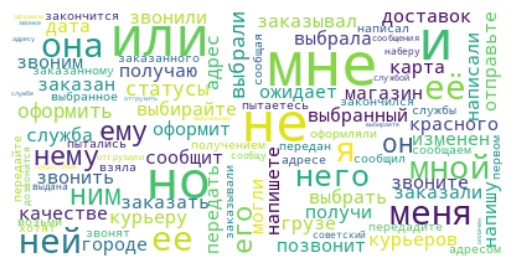

In [48]:
# ваш код для облака чистых сообщений

clean_words_str = " ".join(words_clean)
clean_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white', stopwords='None').generate(clean_words_str)
plt.figure()
plt.imshow(clean_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

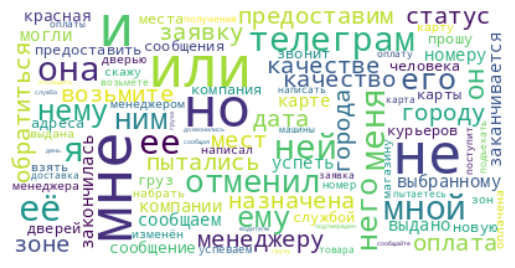

In [49]:
# ваш код для облака фродовых сообщений
fraud_words_str = " ".join(words_fraud)
fraud_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white', stopwords='None').generate(fraud_words_str)
plt.figure()
plt.imshow(fraud_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Из облаков слов можно сделать три вывода:
*   **Стоп-слова:** Самые часто встречающиеся слова в сообщениях --- вспомогательные слова типа «и», «или», и так далее. Такие слова не определяют смысла текстов и, как правило, не очень полезны в анализе, поэтому их называют стоп словами (stopwords). Обычно при анализе текстов такие слова просто исключают.
*   **Ключевые слова:** Заметим, что во фродовых сообщениях есть некоторые слова, которые редко встречаются в чистых сообщениях («телеграм», «отмена»). Это подсказывает нам возможный подход к построению бизнес-правила: мы можем определить набор слов-флагов, которые сигнализируют нам фрод.
*   **Лемматизация:** Наконец, видим, что в облаках слов встречаются разные формы одного и того же слова («выбрать», «выбрала», «выбранный», ...). С точки зрения сравнения строк, это разные слова, но с точки зрения языка они несут схожий смысл. Чтобы лучше учесть логику языка, в анализе текста часто применяется [лемматизация](https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%BC%D0%BC%D0%B0%D1%82%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F) --- процесс приведения слова к лемме (нормальной или словарной форме). Например, все три варианта («выбрать», «выбрала», «выбранный») приводятся к лемме «выбирать».

*Внимание:* если из ваших облаков слов вы не можете сделать таких выводов, то, возможно, что-то пошло не так. Напишите `@stelmakh95` --- разберемся :)

**<font color='orange'>Задача 4. Нормализация [10 баллов]</font>** Удалите из сообщений стоп-слова русского языка и проведите лемматизацию. К счастью, в Python уже есть библиотеки, которые упрощают эту задачу, поэтому вам не нужно самим придумывать стоп-слова или алгоритмы лемматизации.

In [50]:
# 1. Получите список стоп-слов

# pip install nltk
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
s_words = stopwords.words("russian")

# 2. Удалите стоп-слова из сообщений

# Ваш код по удалению стоп-слов здесь
words_fraud = set([word for word in words_fraud if word not in s_words])
words_clean = set([word for word in words_clean if word not in s_words])

print()
print('quantity of clean words without stopwords:', len(words_clean))
print('quantity of fraud words without stopwords:', len(words_fraud))


quantity of clean words without stopwords: 928
quantity of fraud words without stopwords: 922


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# 1. Воспользуемся решением по лемматизации для русского языка от Яндекса
# pymystem3: https://pypi.org/project/pymystem3/

# pip install pymystem3

from pymystem3 import Mystem

#Создаем метод, который может лемматизировать любой текст
lemmatizer = Mystem()

#Пример
example = lemmatizer.lemmatize("выбранный")
print(example)

# 2. Лемматизируйте все слова в сообщениях

# Ваш код по лемматизации здесь

fraud_list = list(map(lemmatizer.lemmatize, words_fraud))
fraud_list = set([word[0] for word in fraud_list])

clean_list = list(map(lemmatizer.lemmatize, words_clean))
clean_list = set([word[0] for word in clean_list])

print()
print("fraud words quantity after lemmatization:", len(fraud_list))
print("clean words quantity after lemmatization:", len(clean_list))

['выбирать', '\n']

fraud words quantity after lemmatization: 214
clean words quantity after lemmatization: 213


Ура, мы подготовили тексты к анализу. Пришло время придумать первое data-driven бизнес-правило.

**<font color='orange'>Задача 5. Частотное бизнес-правило [20 баллов]</font>** Давайте углубимся в идею с ключевыми словами и построим бизнес-правило, которое блокирует сообщения с определенными ключевыми словами.


**5.1 Анализ** Чтобы реализовать такое бизнес-правило, проделайте следующие шаги:

1. Составьте список слов, которые встречаются в нормализованных сообщениях хотя бы один раз (общий список для фродовых и чистых сообщений). Здесь хорошо использовать структуру данных множество: `set` (пройдем на 4 неделе курса).

2. Для каждого слова представьте правило, которое блокирует все сообщения с этим словом. Определите `false_positive_rate` и `false_negative_rate` такого правила

3. Для каждого слова определите метрику эффективности (в деньгах) соответствующего правила (с шага 2)

4. Отсортируйте все слова по эффективности соответствующего правила (от самых эффективных к самым неэффективным) и постройте bar chart финансовых результатов для первых 20 слов

5. Из графика определите список ключевых слов, по которому ваше правило будет блокировать сообщение. Ваше правило должно блокировать сообщение если в нем есть хотя бы одно ключевое слово.

In [52]:
from tqdm import tqdm

In [53]:
def process_message(message):
    message = message.translate(str.maketrans('', '', string.punctuation))
    message = [word.lower() for word in message.split()]
    message = list(map(lemmatizer.lemmatize, message))
    message = [word[0] for word in message]
    message = [word for word in message if word not in s_words]
    return message

#print(fraud_messages[0])
#process_message(fraud_messages[0])

In [19]:
final_set = fraud_list | clean_list
fraud_to_fraud = 0
fraud_to_clean = 0
clean_to_clean = 0
clean_to_fraud = 0
lst = []

for word in tqdm(final_set):
    for message in fraud_messages:
        if word in process_message(message):
            fraud_to_fraud += 1
        else:
            fraud_to_clean += 1
    for message in clean_messages:
        if word in process_message(message):
            clean_to_fraud += 1
        else:
            clean_to_clean += 1
    FPR = round(clean_to_fraud / (fraud_to_fraud + clean_to_fraud), 3) if (fraud_to_fraud + clean_to_fraud) > 0 else 0
    FNR = round(fraud_to_clean / (fraud_to_clean + clean_to_clean), 3) if (fraud_to_clean + clean_to_clean) > 0 else 0
    lst.append([word, cost(DAILY_PURCHASES, FRAUD_SHARE, FALSE_POSITIVE_COST, FALSE_NEGATIVE_COST, FNR, FPR)])
    fraud_to_fraud = 0
    fraud_to_clean = 0
    clean_to_clean = 0
    clean_to_fraud = 0


100%|██████████| 214/214 [16:40<00:00,  4.68s/it]


In [20]:
lst.sort(key=lambda x: x[1])

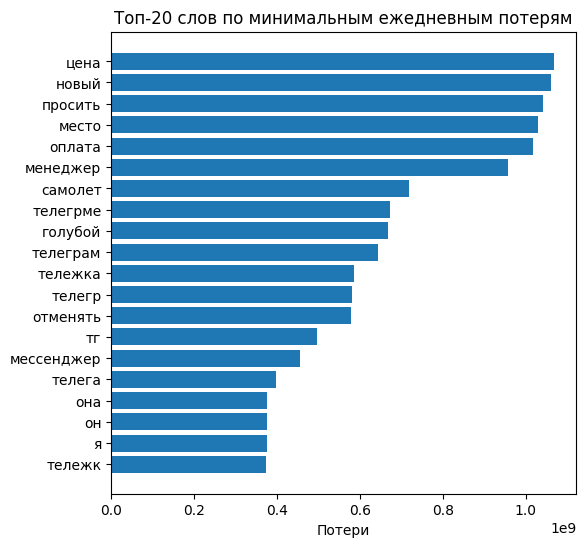

In [21]:
fraud_words = [a[0] for a in lst[:20]]
costs = [a[1] for a in lst[:20]]

plt.figure(figsize = (6, 6))
plt.title("Топ-20 слов по минимальным ежедневным потерям")
plt.xlabel("Потери")
plt.barh(fraud_words, costs);

**5.2 Разработка**  Теперь реализуйте ваше правило end-to-end:
* *Вход*: необработанное сообщение (из сырых данных)
* *Внутренность*: Подготовка и нормализация текста (задачи 3.1 и 4), поиск ключевых слов (задача 5.1)
* *Выход*: Вердикт («fraud» или «clean»)

In [22]:
## Ваш код здесь
def end_to_end_rule(message, fraud_words):
    message = message.translate(str.maketrans('', '', string.punctuation))
    message = [word.lower() for word in message.split()]
    message = list(map(lemmatizer.lemmatize, message))
    message = [word[0] for word in message]
    message = [word for word in message if word not in s_words]


    for word in fraud_words:
        if word in message:
            return 'fraud'
    return 'clean'

**5.3 Оценка эффективности**  Оцените эффективность вашего итогового бизнес-правила (аналогично задачам 2.1 и 2.2)

In [23]:
## Ваш код здесь
res = 0
fraud_to_fraud = 0
fraud_to_clean = 0
clean_to_clean = 0
clean_to_fraud = 0
fraud_words_14 = fraud_words[:14]

for message in fraud_messages:
    if end_to_end_rule(message, fraud_words_14) == 'fraud':
        fraud_to_fraud += 1
    else:
        fraud_to_clean += 1

for message in clean_messages:
    if end_to_end_rule(message, fraud_words_14) == 'fraud':
        clean_to_fraud += 1
    else:
        clean_to_clean += 1

FPR = round(clean_to_fraud / (fraud_to_fraud + clean_to_fraud), 3) if (fraud_to_fraud + clean_to_fraud) > 0 else 0
FNR = round(fraud_to_clean / (fraud_to_clean + clean_to_clean), 3) if (fraud_to_clean + clean_to_clean) > 0 else 0
res += cost(DAILY_PURCHASES, FRAUD_SHARE, FALSE_POSITIVE_COST, FALSE_NEGATIVE_COST, FNR, FPR)

In [24]:
print('Costs of using first 14 fraud words:', res)

Costs of using first 14 fraud words: 410400000.0


**5.4 Комментарий** Прокомментируйте результаты
* Как эффективность частотного бизнес-правила соотносится с бейзлайнами?
* Стоит ли внедрять его в продакшн?
* Как можно доработать это правило?

**Вывод:**
1. Качество лучше бейзлайнов на несколько порядков, также оно лучше чем у первой гипотезы примерно в 2 раза.
2. Вообще потери пока все еще велики, но думаю можно, так как некоторую зависимость мы уловили.
3. Возможно стоит искать не только слова по одному, а искать комбинации слов, но это займет больше времени.

## Наивный Байес (advanced, 20 баллов)

Наше частотное бизнес-правило работает очень просто --- наличие всего одного из ключевых слов в сообщении делает его фродовым. Такое решение может помочь нам потушить пожар на первое время, но в долгосрочной перспективе оно может быть неустойчивым --- как вы видите из анализа, нетривиальная доля честных продавцов блокируются нашим правилом.

Чтобы написать более устойчивое бизнес-правило, нам нужно разработать методы, которые понимают текст глубже, чем на уровне ключевых слов. В курсах по машинному обучению вы научитесь применять к таким задачам большие языковые модели (LLMs), а в этом проекте предлагаем вам реализовать простую статистическую модель --- Наивный Байес.

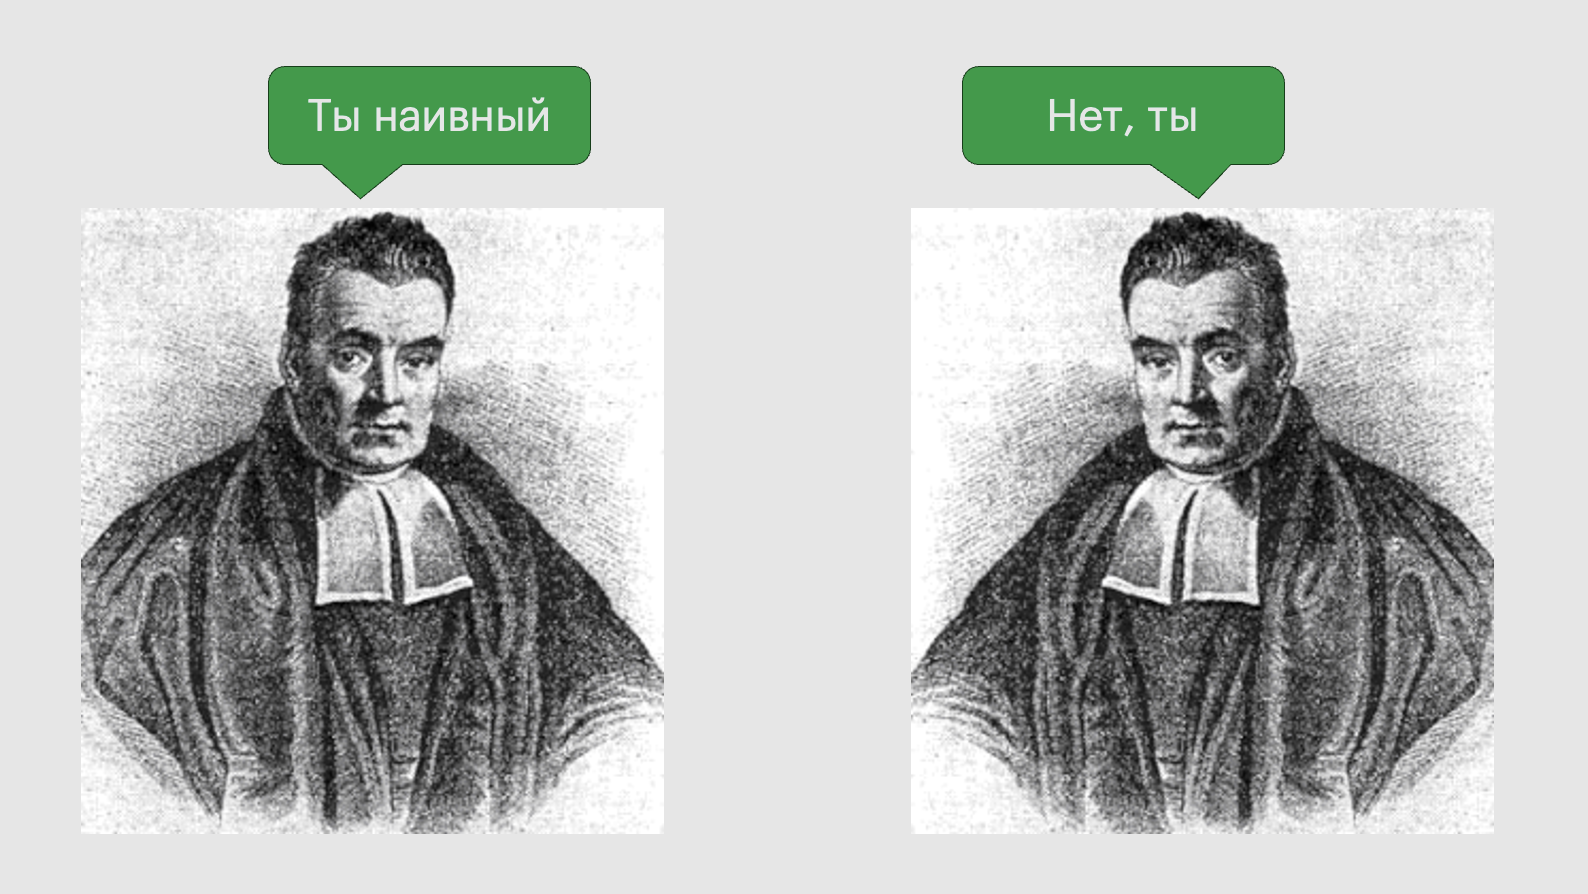

Это advanced задание, поэтому детальных инструкций мы не даем и предлагаем вам самим разобраться и реализовать наивный байесовский классификатор. Несколько наводок:

* Чтобы разобраться, как работает классификатор, можете прочитать статью на [Википедии](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) и/или сходить на advanced-лекцию по Python

* Подготовительные шаги, которые мы с вами проделали ранее (удаление знаков препинания и стоп слов, лемматизация текста), так же полезны и для Байесовского классификатора

* В паре с наивным байесом часто пользуются Лапласовским сглаживанием. Прочитать про него можно [здесь](https://en.wikipedia.org/wiki/Additive_smoothing)


* Подумайте про порог принятия решения. В классическом варианте наивного байеса класс сообщения определяется из сравнения двух вероятностей (`maximum a posteriori`). Но в нашем случае цена ошибки разная для разных типов ошибок (`false positive` и `false negative`). Подумайте, как это учесть.



**Что нужно сделать?**
* Придумайте end-to-end бизнес-правило на основе наивного байеса. Ваше правило должно принимать на вход сообщение из сырых данных и выдавать вердикт («fraud» или «clean»)
* Оцените его эффективность
* Прокомментируйте результаты (Как результаты соотносятся с частотным правилом?, Как можно дальше развивать ваше решение?)

In [54]:
fraud_samples = [process_message(message) for message in fraud_messages]
clean_samples = [process_message(message) for message in clean_messages]

In [85]:
from math import log

def naive_bayes_fit(clean_samples, fraud_samples):
    """
    clean_samples: список списков из обработанных нефродовых слов
    fraud_samples: список списков из обработанных фродовых слов

    return:
    fraud_dct: словарь слов с их вероятностями фрода
    clean_dct: словарь слов с их вероятностями нефрода
    """
    fraud_dct = dict()
    clean_dct = dict()
    clean_cnt = 0
    fraud_cnt = 0

    # Заполняем словарь нефродовых слов парами: (слово, сколько раз встретилось)
    for sample in clean_samples:
        for word in sample:
            if word not in clean_dct:
                clean_dct[word] = 0
            clean_dct[word] += 1
            clean_cnt += 1

    # Заполняем словарь фродовых слов парами: (слово, сколько раз встретилось)
    for sample in fraud_samples:
        for word in sample:
            if word not in fraud_dct:
                fraud_dct[word] = 0
            fraud_dct[word] += 1
            fraud_cnt += 1

    # Добавим в словарь нефродовых слов фродовые слова, которые еще не встретились (это чтобы избежать нуля)
    for clean_word in clean_dct:
        if clean_word not in fraud_dct:
            fraud_dct[clean_word] = 0

    # Аналогично со словарем фродовых слов
    for fraud_word in fraud_dct:
        if fraud_word not in clean_dct:
            clean_dct[fraud_word] = 0

    # Для каждого слова добавляем 1 в обоих словарях, чтобы сохранить приоритет
    for fraud_word in fraud_dct:
        fraud_dct[fraud_word] += 1
        fraud_cnt += 1

    for clean_word in clean_dct:
        clean_dct[clean_word] += 1
        clean_cnt += 1

    # Нормируем и берем логарифм, чтобы суммировать числа, а не перемножать очень маленькие
    for fraud_word in fraud_dct:
        fraud_dct[fraud_word] /= fraud_cnt
        fraud_dct[fraud_word] = -log(fraud_dct[fraud_word])

    for clean_word in clean_dct:
        clean_dct[clean_word] /= clean_cnt
        clean_dct[clean_word] = -log(clean_dct[clean_word])


    return fraud_dct, clean_dct


def naive_bayes_predict(classifier, sample):
    """
    classifier: обученный наивный байесовский классификатор
    sample: обработанное сообщение

    return:
    Предсказание фрода
    """
    fraud_dct, clean_dct = classifier
    fraud_prob = 0
    clean_prob = 0
    for word in sample:
        if word in fraud_dct:
            fraud_prob += fraud_dct[word]
        if word in clean_dct:
            clean_prob += clean_dct[word]

    if clean_prob < fraud_prob:
        return 'clean'
    return 'fraud'

In [86]:
classifier = naive_bayes_fit(clean_samples, fraud_samples)

In [88]:
## Ваш код здесь
res = 0
fraud_to_fraud = 0
fraud_to_clean = 0
clean_to_clean = 0
clean_to_fraud = 0

for message in fraud_messages:
    if naive_bayes_predict(classifier, process_message(message)) == 'fraud':
        fraud_to_fraud += 1
    else:
        fraud_to_clean += 1

for message in clean_messages:
    if naive_bayes_predict(classifier, process_message(message)) == 'fraud':
        clean_to_fraud += 1
    else:
        clean_to_clean += 1

FPR = round(clean_to_fraud / (fraud_to_fraud + clean_to_fraud), 3) if (fraud_to_fraud + clean_to_fraud) > 0 else 0
FNR = round(fraud_to_clean / (fraud_to_clean + clean_to_clean), 3) if (fraud_to_clean + clean_to_clean) > 0 else 0
res += cost(DAILY_PURCHASES, FRAUD_SHARE, FALSE_POSITIVE_COST, FALSE_NEGATIVE_COST, FNR, FPR)
print('clean_to_clean', clean_to_clean)
print('fraud_to_fraud', fraud_to_fraud)
print('clean_to_fraud', clean_to_fraud)
print('fraud_to_clean', fraud_to_clean)
print()
print('Потери при использовании байесовского классификатора', res)

clean_to_clean 943
fraud_to_fraud 976
clean_to_fraud 57
fraud_to_clean 24

Потери при использовании байесовского классификатора 123250000.0


**Итог:** Байесовский классификатор уменьшил нам потери примерно в 3 раза по сравнению с частотным анализом.

Также заметим, что Байесовским классификатором пользоваться было проще и намного быстрее:

**Частотность слов:** 17 минут

**Байес:** секунды